In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import warnings
warnings.simplefilter("ignore")
import sklearn.metrics
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
dataset=pd.read_csv("test.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15725660,Male,30,87000,0
1,15652400,Female,38,50000,0
2,15776844,Male,35,75000,0
3,15738448,Female,30,79000,0
4,15638003,Female,35,50000,0


In [3]:
dataset.shape

(80, 5)

In [4]:
fileobject=open("Train.pkl","rb")
classifier=pickle.load(fileobject)
sc=pickle.load(fileobject)

In [5]:
#split  test data into x_test and y_test
# x_test,y_test=train_test_split(dataset,test_size=0.20,random_state=0)

In [6]:
#separate test data into x and y test data
x_test=dataset.iloc[:,[2,3]].values
y_test=dataset.iloc[:,4].values

In [7]:
x_test.shape,y_test.shape

((80, 2), (80,))

In [8]:
#feature scaling
x_test=sc.transform(x_test)

In [9]:
#predict the x test data
y_pred=classifier.predict(x_test)
# dataset=pd.DataFrame({'Actual':y_test,'Predict':y_pred})

In [10]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[54  4]
 [ 4 18]]


In [11]:
#check accuracy for X train data
Acc_test=sklearn.metrics.precision_score(y_pred,y_test)*100
print(Acc_test)

81.81818181818183


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


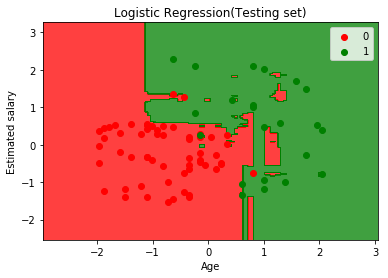

In [12]:
#visualizing the training set result
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression(Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.legend()
plt.show()

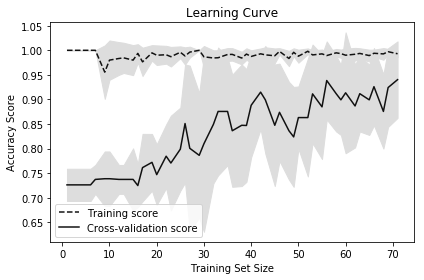

In [15]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
class Training_Random_Forest():
    def visualization_learning_curve(self,X,y,classifier):
        train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

        # Create means and standard deviations of training set scores
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)

        # Create means and standard deviations of test set scores
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        # Draw lines
        plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
        plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

        # Draw bands
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
        plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

        # Create plot
        plt.title("Learning Curve")
        plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
        plt.tight_layout()
        plt.show() 
        
def main():
# instantiation of class
    obj = Training_Random_Forest()

    obj.visualization_learning_curve(x_test,y_test,classifier)

if __name__ == '__main__':
    main()